# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [21]:
import pandas as pd
import numpy as np
from scipy import stats

In [22]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [23]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [24]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>
1. What test is appropriate for this problem? Does CLT apply?
<br>2. What are the null and alternate hypotheses?

In [25]:
data.shape

(4870, 65)

In [26]:
w = data[data.race=='w']
b = data[data.race=='b']

In [27]:
w.shape

(2435, 65)

In [28]:
b.shape

(2435, 65)

CLT applies as the sample size is large enough for resumes for both groups (white-sounding & black-sounding names), way larger than 30. 
<br>$H_0$: There is no difference in the number of callbacks between the 2 groups.
<br>$H_A$: There is difference in the number of callbacks between the 2 groups.

In [29]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [30]:
# Your solution to Q3 here

3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [31]:
# Total number of callbacks for 2 groups
wc = sum(data[data.race=='w'].call)
bc = sum(data[data.race=='b'].call)

# Total number of 2 groups
df_w = data[data.race=='w']
df_b = data[data.race=='b']

# Ratio of callbacks for 2 groups
ratio_w = wc/len(df_w)
ratio_b = bc/len(df_b)
print('Callback ratio for white-sounding-name resumes:', ratio_w)
print('Callback ratio for black_sounding_name resumes:', ratio_b)

Callback ratio for white-sounding-name resumes: 0.09650924024640657
Callback ratio for black_sounding_name resumes: 0.06447638603696099


Based on the ratio calculation above, white-sounding-name resumes receive 9.65% callbacks, more than black-sounding-name resumes of 6.45%.

In [32]:
# Frequentis Approach
# aggregate values
r = np.sum(data.call)
n = len(data)
p = r/n

w = data[data.race == 'w']
b = data[data.race == 'b']

# white-sounding names
w_r = np.sum(w.call)
w_n = len(w)
w_p = (w_r / w_n)


# black-sounding names
b_r = np.sum(b.call)
b_n = len(b)
b_p = (b_r / b_n)


def ztest_proportions_two_samples(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1+1/n2))
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided
    return z, p

# 95% confidence interval
prop_diff = w_p - b_p
print('Observed difference in proportions: \t {}\n'.format(prop_diff))

z_crit = 1.96
p_hat1 = w_p*(1-w_p)/w_n
p_hat2 =  b_p*(1-b_p)/b_n
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

z_stat, p_val = ztest_proportions_two_samples(w_r, w_n, b_r, b_n)
print('z-stat: \t {}\np-value: \t {}'.format(z_stat, p_val))

print('95% confidence interval: \t {} - {}'.format(ci_low, ci_high))
moe = (ci_high - ci_low)/2
print('Margin of error: \t +/-{}'.format(moe))

Observed difference in proportions: 	 0.032032854209445585

z-stat: 	 4.108412152434346
p-value: 	 3.983886837577444e-05
95% confidence interval: 	 0.016777447859559147 - 0.047288260559332024
Margin of error: 	 +/-0.015255406349886438


In [42]:
# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(r) + [False] * int(n-r))

size = 10000

bs_reps_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=w_n))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=b_n))
    
    bs_reps_diff[i] = (w_bs_replicates - b_bs_replicates)/b_n
    
bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)

print('obs diff: {}\n'.format(prop_diff))
print('BOOTSTRAP RESULTS\np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: 0.032032854209445585

BOOTSTRAP RESULTS
p-value: 0.0
95% conf. int.: [-0.01519507  0.01519507]


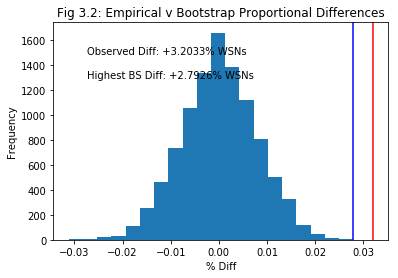

In [43]:
import matplotlib.pyplot as plt
_ = plt.hist(bs_reps_diff, bins=20)
_ = plt.axvline(prop_diff, color='red')
_ = plt.axvline(np.max(bs_reps_diff), color='blue')
_ = plt.xlabel('% Diff')
_ = plt.ylabel('Frequency')
_ = plt.title('Fig 3.2: Empirical v Bootstrap Proportional Differences')
_ = plt.text(-0.0275, 1300, 'Observed Diff: +{:0.5}% WSNs\n\nHighest BS Diff: +{:0.5}% WSNs'.format(prop_diff*100, np.max(bs_reps_diff)*100))

plt.show()

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>
4. Write a story describing the statistical significance in the context or the original problem.
<br>5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The p-value of both methods above are below 0.05, therefore $H_0$ should be rejected. We conclude that race has an impact on the callback ratio. Based on our calculation at Question 3, the callback ratio for resumes with white-sounding names are higher than that with black-sounding names. However, it doesn't mean race/name is the most important factor in callback success, as there are other variables in the dataset that may have an impact, such as education, experience etc. If we want to determine if race/name is the most important factor, we need to make sure we use the same set of resumes with white and black-sounding names. Other factors could also play a role, such as the position applicants applied for, location or company size. We need to take those into consideration as well in the analysis.